In [0]:
#g=nx.karate_club_graph()
edge_index1 = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [0, 12], [0, 13], [0, 17], [0, 19], [0, 21], [0, 31], [1, 2], [1, 3], [1, 7], [1, 13], [1, 17], [1, 19], [1, 21], [1, 30], [2, 3], [2, 7], [2, 8], [2, 9], [2, 13], [2, 27], [2, 28], [2, 32], [3, 7], [3, 12], [3, 13], [4, 6], [4, 10], [5, 6], [5, 10], [5, 16], [6, 16], [8, 30], [8, 32], [8, 33], [9, 33], [13, 33], [14, 32], [14, 33], [15, 32], [15, 33], [18, 32], [18, 33], [19, 33], [20, 32], [20, 33], [22, 32], [22, 33], [23, 25], [23, 27], [23, 29], [23, 32], [23, 33], [24, 25], [24, 27], [24, 31], [25, 31], [26, 29], [26, 33], [27, 33], [28, 31], [28, 33], [29, 32], [29, 33], [30, 32], [30, 33], [31, 32], [31, 33], [32, 33]]
node_labels1 = [0,0,0,0,0,0,0,0,0, 1, 0,0,0,0, 1,1, 0,0, 1,0, 1,0, 1,1,1,1,1,1,1,1,1,1,1,1]
#node_labels = list(map(lambda node : 'r' if node == 0 else 'g', node_labels))
output1 = [[-7.0196e-01, -6.8441e-01],
        [-7.1878e-01, -6.6815e-01],
        [-7.2843e-01, -6.5906e-01],
        [-7.2013e-01, -6.6687e-01],
        [-6.9284e-01, -6.9346e-01],
        [-7.1604e-01, -6.7077e-01],
        [-2.7555e-01, -1.4236e+00],
        [-5.6927e-03, -5.1714e+00],
        [-7.2458e-01, -6.6267e-01],
        [-7.4164e-01, -6.4690e-01],
        [-1.4926e-03, -6.5080e+00],
        [-6.5135e-02, -2.7637e+00],
        [-1.6991e-02, -4.0835e+00],
        [-4.4208e-01, -1.0292e+00],
        [-7.6425e-01, -6.2676e-01],
        [-7.6425e-01, -6.2676e-01],
        [-5.5075e-05, -9.8074e+00],
        [-3.8752e-02, -3.2699e+00],
        [-7.6425e-01, -6.2676e-01],
        [-6.5634e-01, -7.3136e-01],
        [-7.6425e-01, -6.2676e-01],
        [-3.8752e-02, -3.2699e+00],
        [-7.6425e-01, -6.2676e-01],
        [-7.2063e-01, -6.6640e-01],
        [-7.2472e-01, -6.6254e-01],
        [-8.5906e-01, -5.5089e-01],
        [-7.6425e-01, -6.2676e-01],
        [-8.7084e-01, -5.4231e-01],
        [-7.3216e-01, -6.5560e-01],
        [-9.5935e-01, -4.8312e-01],
        [-7.0129e-01, -6.8507e-01],
        [-8.2021e-01, -5.8042e-01],
        [-2.6129e+00, -7.6149e-02],
        [-1.4436e+01, -9.5367e-07]]


[-1.03846766 -1.53156794]


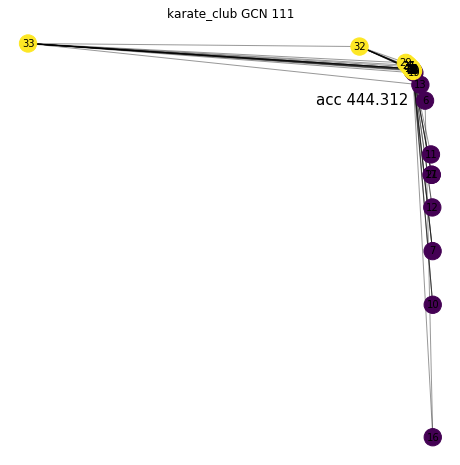

In [21]:
#coding=utf-8
#https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx
#MSC means Multiple Spectral Clustering
 
import numpy as np
 
import scipy as sp
 
import scipy.linalg as linalg
 
import networkx as nx
 
import matplotlib.pyplot as plt

def draw_graph_from_nodelist(edge_index, node_labels, output = 'defult', save_name = 'defult',show_content = 'none'):

    g = nx.from_edgelist(edge_index) 
    
    plt.figure(figsize=(8,8))
    if(output == 'defult'):
        pos=nx.spring_layout(g)
    else:
        pos = {}
        for i in range(len(node_labels)):
            pos[i] = np.array(output[i])
        
    nx.draw_networkx_edges(g,pos,alpha=0.4)

    nx.draw_networkx_nodes(g,pos,nodelist=list(range(0,len(node_labels))),node_color= list(node_labels))

    nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')

    plt.axis('off')
    xy = np.mean(output, axis = 0)
    print(xy)
    if(show_content != 'none'):
        plt.text(xy[0]*4, xy[-1], show_content,fontsize=15)
    if(save_name == 'defult'):
        plt.title("karate_club GCN ")
        plt.savefig("GCN——karate_club-result.png")
        
    else:
        plt.title("karate_club GCN " + str(save_name))
        plt.savefig(str(save_name)+'.png')
%matplotlib inline
draw_graph_from_nodelist(edge_index1, node_labels1, output1,111, show_content = 'acc {:.3f}'.format(444.31233))     

In [0]:
# load data
import networkx as nx
import numpy as np
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
KarateClubGraph = nx.karate_club_graph()
KarateClubGraph_edge_indx = list(map(lambda edge: list(edge),list(KarateClubGraph.edges)))
print(KarateClubGraph_edge_indx)
# KarateClubGraph_feature = np.diag(np.ones(np.max(KarateClubGraph_edge_indx)+1))
# KarateClubGraph_feature = torch.tensor(KarateClubGraph_feature, dtype = torch.float).to(device)
# print(KarateClubGraph_feature.size())
KarateClubGraph_edge_indx = [[row[i] for row in KarateClubGraph_edge_indx] for i in range(len(KarateClubGraph_edge_indx[0]))]
print(KarateClubGraph_edge_indx)

#for node in range(np.max(KarateClubGraph_edge_indx)+1):
distance_features = torch.zeros((34,2), dtype = torch.float).to(device)
print(distance_features.size())
for node in range(34):
    node2manger = nx.shortest_path(KarateClubGraph, source=node, target=0)
    print('path {} , length {}'.format(node2manger, len(node2manger)))
    node2coach = nx.shortest_path(KarateClubGraph, source=node, target=33)
    print('path {} , length {}'.format(node2coach, len(node2coach)))
    distance_features[node][0] = len(node2manger) - 1.0
    distance_features[node][1] = len(node2coach) - 1.0
print(distance_features)
#KarateClubGraph_feature = torch.cat((KarateClubGraph_feature, distance_features),1)
KarateClubGraph_feature = distance_features
print(KarateClubGraph_feature.size())
print(KarateClubGraph_feature)

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [0, 12], [0, 13], [0, 17], [0, 19], [0, 21], [0, 31], [1, 2], [1, 3], [1, 7], [1, 13], [1, 17], [1, 19], [1, 21], [1, 30], [2, 3], [2, 7], [2, 8], [2, 9], [2, 13], [2, 27], [2, 28], [2, 32], [3, 7], [3, 12], [3, 13], [4, 6], [4, 10], [5, 6], [5, 10], [5, 16], [6, 16], [8, 30], [8, 32], [8, 33], [9, 33], [13, 33], [14, 32], [14, 33], [15, 32], [15, 33], [18, 32], [18, 33], [19, 33], [20, 32], [20, 33], [22, 32], [22, 33], [23, 25], [23, 27], [23, 29], [23, 32], [23, 33], [24, 25], [24, 27], [24, 31], [25, 31], [26, 29], [26, 33], [27, 33], [28, 31], [28, 33], [29, 32], [29, 33], [30, 32], [30, 33], [31, 32], [31, 33], [32, 33]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 8, 8, 8, 9, 13, 14, 14, 15, 15, 18, 18, 19, 20, 20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32], [1, 2, 3, 4,

In [0]:
import torch
from torch_geometric.data import Data
edge_index = torch.tensor(KarateClubGraph_edge_indx, dtype = torch.long)
node_features = torch.tensor(KarateClubGraph_feature, dtype = torch.float)
KarateClubData = Data(x = node_features, edge_index = edge_index)
print(KarateClubData)

Data(edge_index=[2, 78], x=[34, 2])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [0]:
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNConv, self).__init__(aggr='add')  # "Add" aggregation.
        self.lin = torch.nn.Linear(in_channels, out_channels)
    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]
# Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
# Step 2: Linearly transform node feature matrix.
        x = self.lin(x)
# Step 3-5: Start propagating messages.
        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)
    def message(self, x_j, edge_index, size):
        # x_j has shape [E, out_channels]
# Step 3: Normalize node features.
        row, col = edge_index
        deg = degree(row, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]
        return norm.view(-1, 1) * x_j
    def update(self, aggr_out):
        # aggr_out has shape [N, out_channels]
# Step 5: Return new node embeddings.
        return aggr_out


In [0]:
def data_test():
    Train_data = KarateClubData
    print(Train_data.num_nodes)
    Train_data.num_classes = 2
    print('data classes num:{}'.format(Train_data.num_classes))
    train_label = [0, 1]
    pridct_lable = np.array(list(range(0,34)), dtype = np.float)
    print(pridct_lable)
    train_mask = np.zeros(pridct_lable.shape,dtype=np.bool)
    train_mask[0] = 1
    train_mask[25] = 1
    print(pridct_lable[train_mask])
    print('Train_data.num_node_features {}'.format(Train_data.num_node_features))
    print('Train_data.edge_index {}'.format(Train_data.edge_index.shape))
    pridct_lable[train_mask] = [0.02, 0.7]
    print(pridct_lable[train_mask])
    import torch.nn.functional as F
    pridct = torch.tensor(pridct_lable[train_mask])
    labels = torch.tensor(train_label)
    input=torch.Tensor([[0.7715, 0.0205]])
    loss = F.nll_loss(input,torch.tensor([0]))
    print(loss)
    # print(edge_index2.shape)
    # conv1 = GCNConv(Train_data.num_node_features,128)
    # print(Train_data.x)
    # out = conv1(Train_data.x,Train_data.edge_index)
    # print(out.shape)
data_test()

34
data classes num:2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
[ 0. 25.]
Train_data.num_node_features 2
Train_data.edge_index torch.Size([2, 78])
[0.02 0.7 ]
tensor(-0.7715)


In [0]:
import torch.nn.functional as F
class GCN_Net(torch.nn.Module):
    def __init__(self):
        super(GCN_Net, self).__init__()
        self.conv1 = GCNConv(in_channel, hidden_channels[0])
        self.conv2 = GCNConv(hidden_channels[0], hidden_channels[1])
        self.conv3 = GCNConv(hidden_channels[1], out_channel)
    def forward(self,data):
        x, edge_index = data.x, data.edge_index
        #print("input x {}".format(x))
        #input x is [N, N]
        x = F.relu(self.conv1(x, edge_index))
        #x = F.dropout(x, training=self.training)
        #output x is [N, hidden_channels[0]] 64
        x = F.relu(self.conv2(x, edge_index))
        #x = F.dropout(x, training=self.training)
        # output [N,32]
        x = self.conv3(x, edge_index)
        # output [N, out_channel] out_channel = 2
        return F.log_softmax(x, dim = 1)



CUDA_LAUNCH_BLOCKING=1

In [0]:
import torch.nn.functional as F
#about model settings, and data
Train_data = KarateClubData

in_channel = Train_data.num_node_features
Train_data.num_classes = 2
out_channel = Train_data.num_classes
hidden_channels = [34,5]
data = KarateClubData
#
# train_mask = torch.zeros((in_channel,out_channel),dtype=torch.uint8)
# train_mask[0] = 1
# train_mask[33] = 1

labeled_nodes = torch.tensor([0, 33]) 
#print(train_mask)
data_y = torch.tensor([0,1])
#about torch model
data_y_labels = torch.tensor([0,0,0,0,0,0,0,0,0, 1, 0,0,0,0, 1,1, 0,0, 1,0, 1,0, 1,1,1,1,1,1,1,1,1,1,1,1]).to(device)
print(len(data_y_labels))
print('using ' + str(device))

model = GCN_Net().to(device)
data = data.to(device)
data_y = data_y.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
acc_best = 0.0
best_epoch = 0
best_pred = []

data_edge_index_list =data.edge_index.tolist()
data_edge_index_list = [[row[i] for row in data_edge_index_list] for i in range(len(data_edge_index_list[0]))]

data_y_labels_list = data_y_labels.tolist()
output_all = []
for epoch in range(500):
    model.train()
    
    out = model(data)
    #print('out compute loss {}'.format(out[labeled_nodes].view(-1, out_channel)))
    loss = F.nll_loss(out[labeled_nodes].view(-1, out_channel), data_y)
    print("[{}] epoch  loss: {}".format(epoch, loss.item()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    #print(model(data))
    output = model(data)
    _, pred = output.max(dim = 1)
    correct = float(pred.eq(data_y_labels).sum().item())
    acc = correct / 34 * 100.0
    if(acc > acc_best):
        acc_best = acc
        best_epoch = epoch
        best_output = output.detach()
    print(acc)
    output_all.append((acc, output))
    
print('\n\nBest Accuracy:{}% in Epoch {} output{}'.format(acc_best, best_epoch , best_output))



34
using cuda
[0] epoch  loss: 0.4302835762500763
0.6176470588235294
[1] epoch  loss: 0.38894951343536377
0.5294117647058824
[2] epoch  loss: 0.36968082189559937
0.5
[3] epoch  loss: 0.3607173264026642
0.5
[4] epoch  loss: 0.3563750684261322
0.5
[5] epoch  loss: 0.35414111614227295
0.5
[6] epoch  loss: 0.35292279720306396
0.5
[7] epoch  loss: 0.3522244095802307
0.5
[8] epoch  loss: 0.3518068790435791
0.5
[9] epoch  loss: 0.351546049118042
0.5
[10] epoch  loss: 0.3513783812522888
0.5
[11] epoch  loss: 0.35126614570617676
0.5
[12] epoch  loss: 0.3511889576911926
0.5
[13] epoch  loss: 0.35113444924354553
0.5
[14] epoch  loss: 0.35109513998031616
0.5
[15] epoch  loss: 0.3510660231113434
0.5
[16] epoch  loss: 0.3510439991950989
0.5
[17] epoch  loss: 0.3510272800922394
0.5
[18] epoch  loss: 0.35101401805877686
0.5
[19] epoch  loss: 0.3510035276412964
0.5
[20] epoch  loss: 0.35099491477012634
0.5
[21] epoch  loss: 0.3509877324104309
0.5
[22] epoch  loss: 0.35098153352737427
0.5
[23] epoch  lo

In [23]:
import matplotlib.pyplot as plt
import imageio,os
files = list(map(lambda x:str(x)+'.png', list(range(0,250))))
print(files)
images = []
#filenames=sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
files = list(map(lambda x:str(x)+'.png', list(range(0,450))))
print(files)
for filename in files:
    images.append(imageio.imread(filename))
#imageio.mimsave('gif.gif', images,duration=1)
imageio.mimsave('result.gif', images,fps=25)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png'

![Vis](result.gif)

后面的代码没用了

In [0]:
import zipfile
def zip_files( files, zip_name ):
    zip = zipfile.ZipFile( zip_name, 'w', zipfile.ZIP_DEFLATED )
    print ('compressing')
    for file in files:
        zip.write( file )
    zip.close()
    print ('compressing finished')

In [0]:
files = list(map(lambda x:str(x)+'.png', list(range(0,250))))
print(files)
zip_files(files,'GCN_plot')

In [0]:
import imageio

outfilename = "output.gif" # 转化的GIF图片名称
filenames = []
for i in range(100):
    filename = str(i)+'.png'
    filenames.append(filename)
frames = []
for image_name in filenames:
    im = imageio.read(image_name)           # 读取方式上存在略微区别，由于是直接读取数据，并不需要后续处理
    frames.append(im)
imageio.mimsave(outfilename, frames, 'GIF', duration=0.1) # 生成方式也差不多

ValueError: ignored

In [0]:
!pip install images2gif
from PIL import Image 
from images2gif import writeGif
outfilename = "my.gif" # 转化的GIF图片名称           
filenames = []         # 存储所需要读取的图片名称
for i in range(100):   # 读取100张图片
    filename = str(i)+'.png'   # path是图片所在文件，最后filename的名字必须是存在的图片 
    filenames.append(filename)              # 将使用的读取图片汇总
frames = []
for image_name in filenames:                # 索引各自目录
    im = Image.open(image_name)             # 将图片打开，本文图片读取的结果是RGBA格式，如果直接读取的RGB则不需要下面那一步
    im = im.convert("RGB")                  # 通过convert将RGBA格式转化为RGB格式，以便后续处理 
    im = np.array(im)                       # im还不是数组格式，通过此方法将im转化为数组
    frames.append(im)                       # 批量化
writeGif(outfilename, frames, duration=0.1, subRectangles=False) # 生成GIF，其中durantion是延迟，这里是1ms

ImportError: ignored

In [0]:
!pwd

/content
